In [76]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import string
from random import shuffle

def will_latin(num):
    """
    Parameters:
    ----------------
    
    num: numbers of treatments
    """
    first_arr = {}
    second_arr = {}
    # Select the names(numbers) that need to be used by the given number
    letter_to_use = []
    for i in range(num):
        letter_to_use.append(i)
    shuffle(letter_to_use)
    reverse_letters = letter_to_use[::-1]
    for i in range(num):
        # Construct the right order sequence
        right_order = letter_to_use[i:] + letter_to_use[0:i]
        first_arr[i] = right_order
        # The reverse order sequence
        second_arr[i] = right_order[::-1]
    
    # After construct the two sequence, now we start to build the william's Latin square
    final_arr = {}
    for i in range(num):
        final_arr[i] = []
        for j in range(2 * num):
            if j % 2 == 0:
                final_arr[i].append(first_arr[i][j // 2])
            else:
                final_arr[i].append(second_arr[i][j // 2])
    
    # Now we need to consider the given number is even or odd
    if num % 2 == 0:
        arr_1 = {}
        arr_2 = {}
        for key in final_arr:
            arr_1[key] = final_arr[key][0:num]
            arr_2[key] = final_arr[key][num:]
        return arr_1, arr_2, final_arr
    else: # num is odd
        return final_arr

In [4]:
from itertools import product

def initiation(num_of_treatments, order_to_consider):
    """
    Parameters:
    ----------------
    
    num_of_treatments: numbers of single treatments (eg: [AB] is 2 and [ABC] is 3)
    order_to_consider: consider second order or only first order
    
    Return:
    ----------------
    var_dict: a dict indicating relationship between number and the sequenct it represent
    array_dicts: the sequence constructed by william's latin square
    """
    all_letters = string.ascii_uppercase
    total_comb = num_of_treatments ** 2 # if only consider first order
    if "second" in order_to_consider:
        total_comb = total_comb * num_of_treatments
        prods = product(all_letters[:num_of_treatments], repeat = 3)
    else:
        prods = product(all_letters[:num_of_treatments], repeat = 2)
    
    # Create a dictionary for storing variable name in latin square and the correspongding combination
    var_dict = {}
    index = 0
    for comb in prods:
        var_dict[index] = "".join(comb)
        index += 1
    
    # Construct william's latin square with the number calculated above and return the result
    # Also return the dict of the relationship between names and combinations
    return var_dict, will_latin(total_comb)

In [5]:
def total_check(seq_dict, var_dict, order, to_shuffle = False, until = 0, user_sequence = "", to_print = True):
    """
    Parameters:
    ----------------
    seq_dict: the sequence dictionary to check
    var_dict: a dict indicating relationship between number and the sequenct it represent
    order: check first order or second order
    to_shuffle: whether to shuffle the dict or not, default is false
    until: check sequence until a given index, default is 0, meaning check all the sequence
    user_sequence: sometimes user want to manually add sequence, use this, default is "" meaning
                   use the seq_dict to construct sequence(to_shuffle must be false if use user sequence)
    to_print: whether to print details result, default is true
    
    Return:
    ----------------
    True if criterions met, False otherwise
    """
    # First construct sequence using seq_dict if no sequence given by user
    full_sequence = user_sequence
    if full_sequence == "":
        key_list = list(seq_dict.keys())
        if to_shuffle == True: # If to_shuffle is true, shuffle the keys so the rows of the latin square is random
            shuffle(key_list)
        for key in key_list:
            seq = seq_dict[key]
            for item in seq:
                full_sequence += var_dict[int(item)]
    
    # Now start to check sequence
    # First see if until is set, if yes, we take a subsequence of the original sequence
    if until != 0:
        full_sequence = full_sequence[:until]
    # Start to check
    if "second" in order: # Check second order
        criterion_count = np.zeros(len(list(var_dict.values())))
        criterions = list(var_dict.values())
        for i in range(len(full_sequence)):
            if i > 1:
                for j in range(len(criterions)):
                    if full_sequence[i-2:i+1] == criterions[j]:
                        criterion_count[j] += 1
        
        # If the difference between counts are trivial, consider true
        score_list = list(criterion_count)
        score_list.sort()
        
        # Construct a new var_dict for checking first order conditions
        new_var_dict = {}
        letters_used_set = set(list(full_sequence))
        letters = ""
        for item in letters_used_set:
            letters += item
        # Get first order vars
        prods = product(letters, repeat = 2)
        index = 0
        for comb in prods:
            new_var_dict[index] = "".join(comb)
            index += 1

        # Get and return result
        if score_list[0] == score_list[-1]:
            # Still need to check first order condition
            return total_check({}, new_var_dict, "first", False, until, full_sequence, to_print = False)
        elif (score_list[-1] - score_list[0]) / score_list[-1] <= 0.33:
            if to_print:
                for i in range(len(criterions)):
                    print("{}\'s count is {}".format(criterions[i], criterion_count[i]))
            return total_check({}, new_var_dict, "first", False, until, full_sequence, to_print = False)
        elif score_list[-1] <= 10 and score_list[0] != 0 and score_list[-1] - score_list[0] <= 3:
            if to_print:
                for i in range(len(criterions)):
                    print("{}\'s count is {}".format(criterions[i], criterion_count[i]))
            return total_check({}, new_var_dict, "first", False, until, full_sequence, to_print = False)
        else:
            if to_print:
                print(score_list[-1], score_list[0])
                print("sequence is {}".format(full_sequence))
                print()
                for i in range(len(criterions)):
                    print("{}\'s count is {}".format(criterions[i], criterion_count[i]))
            return False
    # Now check first order conditions
    else:
        criterion_count = np.zeros(len(list(var_dict.values())))
        criterions = list(var_dict.values())
        for i in range(len(full_sequence)):
            if i > 0:
                for j in range(len(criterions)):
                    if full_sequence[i-1:i+1] == criterions[j]:
                        criterion_count[j] += 1
        
        # If the difference between counts are similar, consider true
        score_list = list(criterion_count)
        score_list.sort()

        # Get and return result
        if score_list[0] == score_list[-1]:
            if to_print:
                print("sequence is {}".format(full_sequence))
                print()
            return True
        elif (score_list[-1] - score_list[0]) / score_list[-1] <= 0.25:
            if to_print:
                print("sequence is {}".format(full_sequence))
                print()
                for i in range(len(criterions)):
                    print("{}\'s count is {}".format(criterions[i], criterion_count[i]))
            return True
        elif score_list[-1] <= 10 and score_list[0] != 0 and score_list[-1] - score_list[0] <= 2:
            if to_print:
                print("sequence is {}".format(full_sequence))
                print()
                for i in range(len(criterions)):
                    print("{}\'s count is {}".format(criterions[i], criterion_count[i]))
            return True
        else:
            if to_print:
                print("sequence is {}".format(full_sequence))
                print()
                for i in range(len(criterions)):
                    print("{}\'s count is {}".format(criterions[i], criterion_count[i]))
            return False

In [72]:
def random_sequence(num, length):
    '''
    Parameter:
    ------------------------------
    
    num: same meaning as will_latin's num, e.g., if want AB, input 2, want ABC, input 3
    length: sequence length, meaning how long a sequence we want to build
    '''
    full_sequence = ""
    letters_needed = list(string.ascii_uppercase[:num])
    for i in range(length):
        full_sequence += random.choice(letters_needed)
    return full_sequence

In [22]:
def get_sequence(seq_dict,var_dict,length = 0):
    """
    Return a required length sequence to operate, also return if the sequence is good or not
    by using the function total_check
    
    Parameters:
    ----------------
    seq_dict: the sequence dictionary to check
    var_dict: a dict indicating relationship between number and the sequenct it represent
    length: provide a required length to consider, default is 0 which means whatever the length in seq_dict
    """
    # First construct sequence using seq_dict
    # if the sequence length is longer than the required length, cut it to the point, if not, reshuffle the
    # rows of latin square and add to the sequence
    full_sequence = ""
    key_list = list(seq_dict.keys())
    
    shuffle(key_list)
    for key in key_list:
        seq = seq_dict[key]
        for item in seq:
            full_sequence += var_dict[int(item)]
            
    if length != 0:
        while len(full_sequence) < length:
            shuffle(key_list)
            for key in key_list:
                seq = seq_dict[key]
                for item in seq:
                    full_sequence += var_dict[int(item)]
        full_sequence = full_sequence[:length]
    
    # Check the quality of this constructed sequence
    quality = total_check(seq_dict, var_dict, "second", user_sequence = full_sequence, to_print = False)
    
    return full_sequence, quality

In [194]:
def design_matrix(full_sequence):
    """
    Return a matrix containing treatment like:
    t   trt   Y_t   trt-1   z_t   z_t-1   z_tz_t-1
    0   A     ...   ---     0     ---     -------
    1   B     ...   A       1     0       0
    2   B     ...   B       1     1       1
    .....
    .....
    
    Here we only consider two treatment types (A and B) and hence we define A as 0 and B as 1
    
    So first column represents actual sequence, second column represents the item privous to each item,
    third column represents the product of the first two columns.
    
    Parameter:
    ------------------
    full_seuqnce: the sequence to consider
    """
    seq_len = len(full_sequence)
    dm = np.zeros([seq_len, 3])
    for i in range(seq_len):
        if full_sequence[i] == "A":
            dm[i, 0] = 0.5
            if i + 1 < seq_len:
                dm[i + 1, 1] = 0.5
        else:
            dm[i, 0] = -0.5
            if i + 1 < seq_len:
                dm[i + 1, 1] = -0.5
    dm[:, 2] = dm[:, 0] * dm[:, 1]
    
    return dm

In [64]:
def get_y(beta1, beta2, design_matrix, err_std = 1, beta3 = 0):
    """
    Change: beta3 is now a optional parameter.
    
    Take given parameter values and calculate y (response)
    y_t = beta1 * z_t + beta2 * z_t-1 + beta3 * (z_tz_t-1) + err
    
    Parameters:
    -------------------
    beta1: parameter corresponding with current item
    beta2: parameter corresponding with immediately previous item
    beta3: parameter corresponding with the product of current item and previous item, default is 0 means we don't 
           consider such cases.
    design_matrix: the matrix calculated by the design matrix function
    err_std: error term's standard deviation, default is 1. (error term is draw from a normal distribution
             with mean 0 and std the given value or 1 by default)
    """
    
    m, n = design_matrix.shape
    y = np.zeros(m)
    for i in range(m):
        err = np.random.normal(0, err_std)
        y[i] = beta1 * design_matrix[i, 0] + beta2 * design_matrix[i, 1] + beta3 * design_matrix[i, 2] + err
    
    return y 

In [180]:
def cov(design_matrix):
    """
    Calculate cov of design matrix
    """
    return np.linalg.det(np.matmul(design_matrix.T, design_matrix))

In [198]:
def experiment(beta1, beta2, beta3, quality, err_std = 1, sample_size = 1000):
    """
    Run an experiment and return dictionary containing beta values
    
    Parameters:
    -------------------
    quality: state what quality do you want for the experiment, "perfect" means all sample latin square need to
             pass the test, "alright" means the latin square samples that don't pass the test, "whatever" means
             random sequence, "ABAB" means a sequence containing ABABAB...
    sample_size: how many samples to draw, default is 1000
    other parameters similar as in other functions
    """
    
    seq_size_list = [24 + 12 * i for i in range(15)]
    
    beta1_dict = {}
    beta2_dict = {}
    beta3_dict = {}
    cov_dict = {}
    
    # Draw sample and calculate standard error of beta
    for seq_size in seq_size_list:
        count = 0
        beta1_dict[seq_size] = []
        beta2_dict[seq_size] = []
        beta3_dict[seq_size] = []
        cov_dict[seq_size] = []
        
        while count < sample_size:
            var_dict, (s1, s2, s3) = initiation(2, "second")
            seq_dict = random.choice((s1,s2,s3))
            if "whatever" not in quality:
                r1, r2 = get_sequence(seq_dict, var_dict, seq_size)
                if r2 == True and "perfect" in quality:
                    dm = design_matrix(r1)
                    cov_dict[seq_size].append(cov(dm))
                    y = get_y(beta1, beta2, beta3, dm, err_std = err_std)
                    betas,a,b,c = np.linalg.lstsq(dm, y, rcond = None) # a,b,c is other values the function returns
                                                                        # not important, so we use a,b,c
                    beta1_dict[seq_size].append(betas[0])
                    beta2_dict[seq_size].append(betas[1])
                    beta3_dict[seq_size].append(betas[2])
                    count += 1
                elif r2 == False and "alright" in quality:
                    dm = design_matrix(r1)
                    cov_dict[seq_size].append(cov(dm))
                    y = get_y(beta1, beta2, beta3, dm, err_std = err_std)
                    betas,a,b,c = np.linalg.lstsq(dm, y, rcond = None)
                    beta1_dict[seq_size].append(betas[0])
                    beta2_dict[seq_size].append(betas[1])
                    beta3_dict[seq_size].append(betas[2])
                    count += 1
#                 elif "ABAB" in quality:
#                     sequence = ABAB(seq_size)
#                     dm = design_matrix(sequence)
#                     cov_dict[seq_size].append(cov(dm))
#                     y = get_y(beta1, beta2, beta3, dm, err_std = err_std)
#                     betas,a,b,c = np.linalg.lstsq(dm, y, rcond = None)
#                     beta1_dict[seq_size].append(betas[0])
#                     beta2_dict[seq_size].append(betas[1])
#                     beta3_dict[seq_size].append(betas[2])
#                     count += 1
            else: # All random case
                sequence = random_sequence(2, seq_size)
                dm = design_matrix(sequence)
                cov_dict[seq_size].append(cov(dm))
                y = get_y(beta1, beta2, beta3, dm, err_std = err_std)
                betas,a,b,c = np.linalg.lstsq(dm, y, rcond = None)
                beta1_dict[seq_size].append(betas[0])
                beta2_dict[seq_size].append(betas[1])
                beta3_dict[seq_size].append(betas[2])
                count += 1
            
    return beta1_dict, beta2_dict, beta3_dict

In [151]:
def MSE(estimate_array, true_value):
    """
    Calculate mean standard error
    
    Parameters:
    -------------------
    estimate_array: a numpy array containing all estimated values of the true value
    true_value: the value to estimate
    """
    return np.mean((estimate_array - true_value) ** 2)

In [170]:
def ABAB(length):
    """return a sequence in the form of ABABABAB...."""
    
    return "AB" * (length // 2)

In [197]:
def draw_plot(beta1,beta2,beta3, draw, err_std = 1,sample_size = 1000):
    """
    Draw 3 plots:
    1. for standard error of betas
    2. mean value of beta hat and std
    3. MSE of beta hat
    
    Parameters:
    -------------------
    draw: which beta to draw, give 1 or 2 or 3
    parameters similar as the above function
    """
    name_dict = {1:beta1, 2:beta2, 3:beta3}
    fig, ax1 = plt.subplots(figsize = (15,10))
    fig, ax2 = plt.subplots(figsize = (15,10))
    fig, ax3 = plt.subplots(figsize = (15,10))
    quality_list = ["perfect", "alright", "whatever"]
    for qu in quality_list:
        mean_list = []
        se_list = []
        mse_list = []
        beta1_dict, beta2_dict, beta3_dict = experiment(beta1, beta2, beta3, qu, 
                                                        err_std = err_std, sample_size = sample_size)
        beta_to_draw = beta1_dict.copy()
        if draw == 2:
            beta_to_draw = beta2_dict.copy()
        elif draw == 3:
            beta_to_draw = beta3_dict.copy()
        
        for key in beta_to_draw:
            mean_list.append(np.mean(beta_to_draw[key]))
            se_list.append(np.std(beta_to_draw[key]) / np.sqrt(sample_size))
            mse_list.append(MSE(np.array(beta_to_draw[key]), name_dict[draw]))
        
        # Actual plotting
        # First plot
        ax1.plot(beta_to_draw.keys(), se_list, label = "{}, beta{}".format(qu, draw))
        
        # Second plot
        ax2.plot(beta_to_draw.keys(), mean_list, label = "{}, beta{}".format(qu, draw))
        ax2.fill_between(beta_to_draw.keys(), np.array(mean_list) - np.array(se_list), 
                        np.array(mean_list) + np.array(se_list), alpha = 0.5)
        
        # Third plot
        ax3.plot(beta_to_draw.keys(), mse_list, label = "{}, beta{}".format(qu, draw))
    ax1.set_title("Standard error with beta values {}, {}, {}, err_std is {}".format(beta1,beta2,beta3,err_std))
    ax1.legend()
    
    ax2.set_title("Mean value of beta hat and se with beta values {}, {}, {}, err_std is {}".format(beta1,beta2,beta3,err_std))
    ax2.axhline(y = name_dict[draw], color='r', linestyle='-')
    ax2.legend()
    
    ax3.set_title("MSE with beta values {}, {}, {}, err_std is {}".format(beta1,beta2,beta3,err_std))
    ax3.legend()
    #ax.set_xticks([24 + 12 * i for i in range(15)])
    
    plt.show()
    
    return None

## Trial area

In [193]:
#beta1_dict, beta2_dict, beta3_dict, cov_dict = experiment(0.5, 0.25, 0.125, "perfect")
perfect_cov = []
for key in cov_dict:
    perfect_cov.append(np.mean(cov_dict[key]) / key)
perfect_cov

[52.67491666666667,
 179.78672222222224,
 428.7587083333335,
 836.2517833333337,
 1452.1492916666657,
 2301.7154523809522,
 3445.8194270833333,
 4897.4452129629635,
 6733.130649999994,
 8949.927515151508,
 11641.28034027778,
 14786.610583333335,
 18495.52113690476,
 22729.949405555555,
 27620.684744791666]

In [187]:
#beta1_dict, beta2_dict, beta3_dict, cov_dict2 = experiment(0.5, 0.25, 0.125, "whatever")
whatever_cov = []
for key in cov_dict2:
    whatever_cov.append(np.mean(cov_dict2[key]))
whatever_cov
print(np.array(perfect_cov) - np.array(whatever_cov))

[   260.714    958.557   2232.284   4207.096   7753.778  12888.636
  18882.062  28066.7    37505.831  47778.156  67502.265  84242.311
 100976.765 125776.888 156953.733]


In [204]:
var_dict, (s1, s2, s3) = initiation(2, "second")
r1, r2 = get_sequence(s1, var_dict, 96)
print(r1)
print(r2)

BBAABAAABBABBBBAAAABBBAABAAABBAAABBBBABAABABABBAABBBBBBAAAABAAABBABABABAAABBBABBBABAABBBABBAAAAA
True


In [203]:
text_file = open("Output.txt", "w")
text_file.write("BAABBABABABBAAAAABABABBBAAABABABABAABBBBBAAABABBABBAABBBABBBBAAABABABAAABBAABBBAAAABBABBBBAAAABA")
text_file.close()

In [205]:
text_file = open("Output2.txt", "w")
text_file.write("BBAABAAABBABBBBAAAABBBAABAAABBAAABBBBABAABABABBAABBBBBBAAAABAAABBABABABAAABBBABBBABAABBBABBAAAAA")
text_file.close()

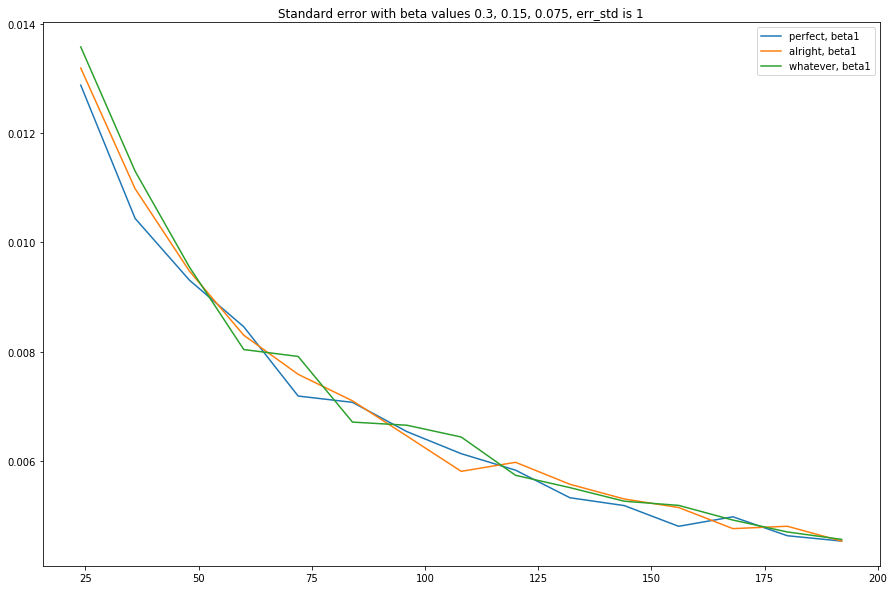

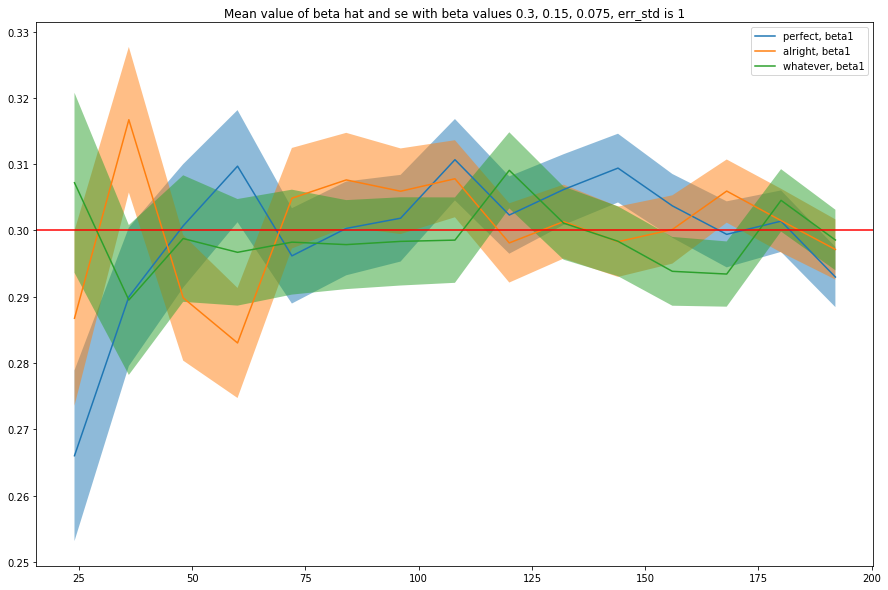

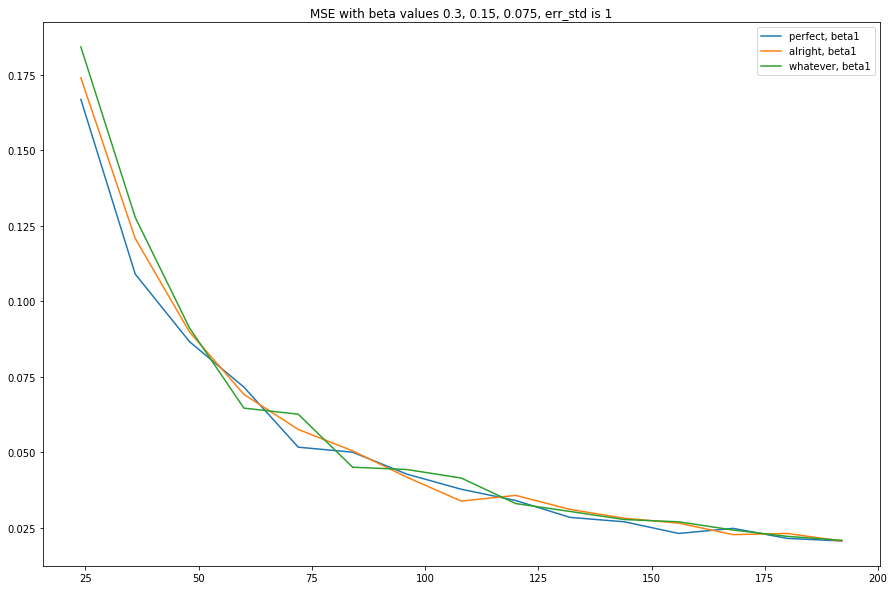

In [199]:
draw_plot(0.3,0.15,0.075, 1)

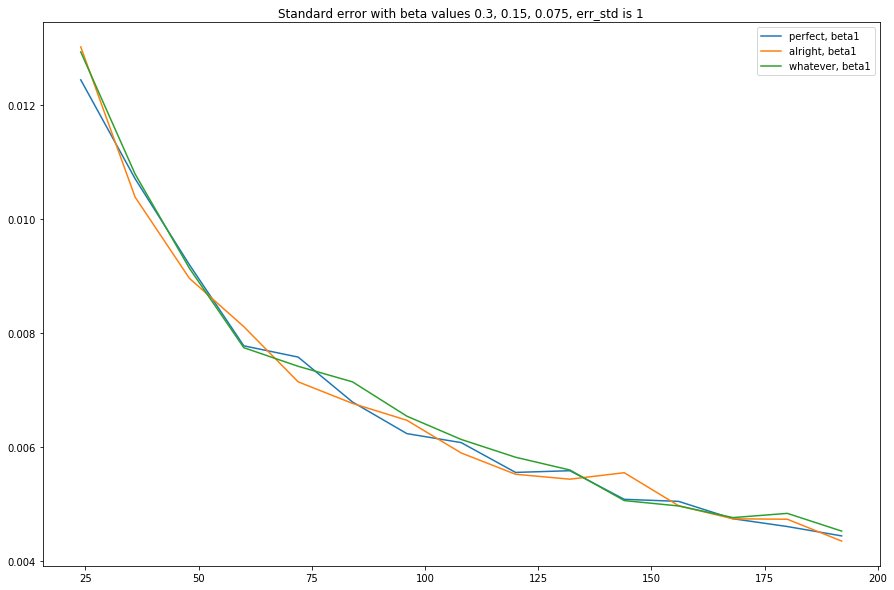

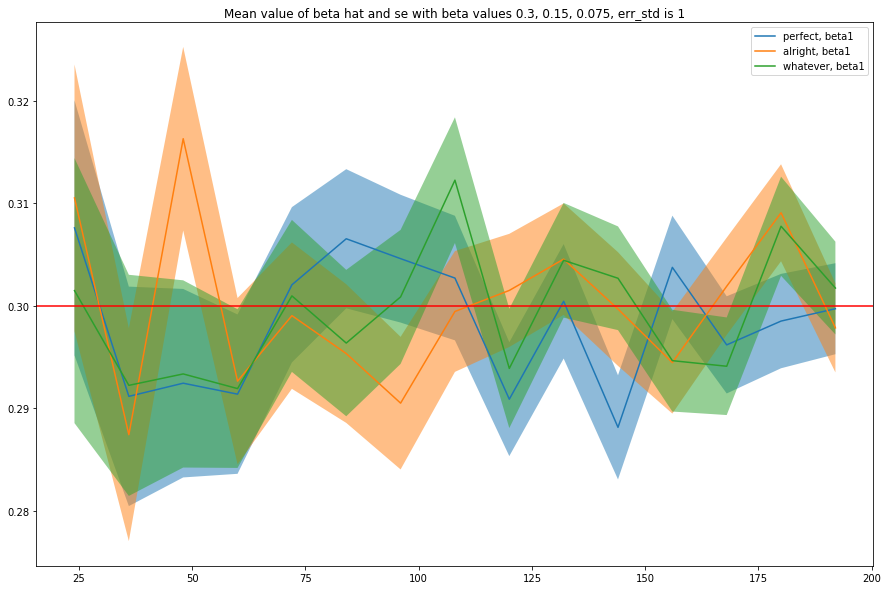

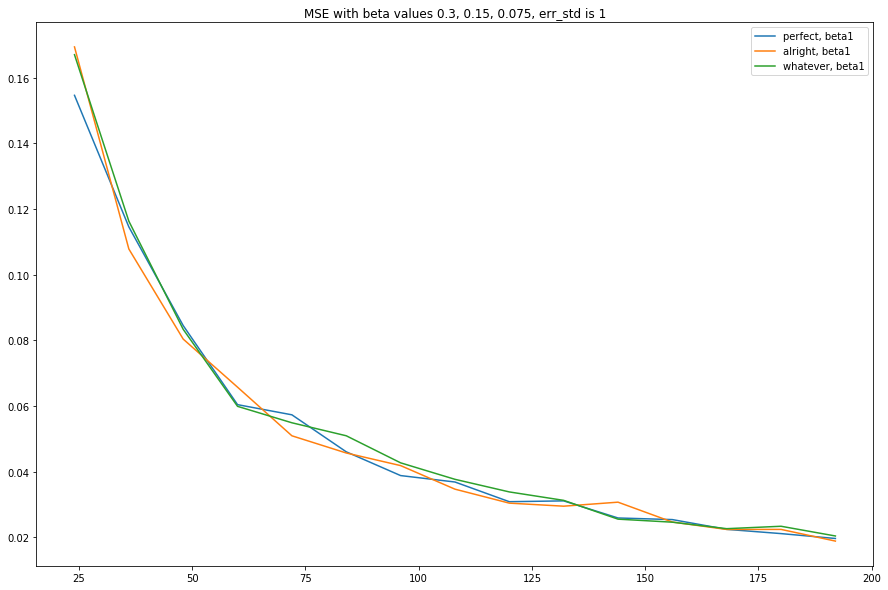

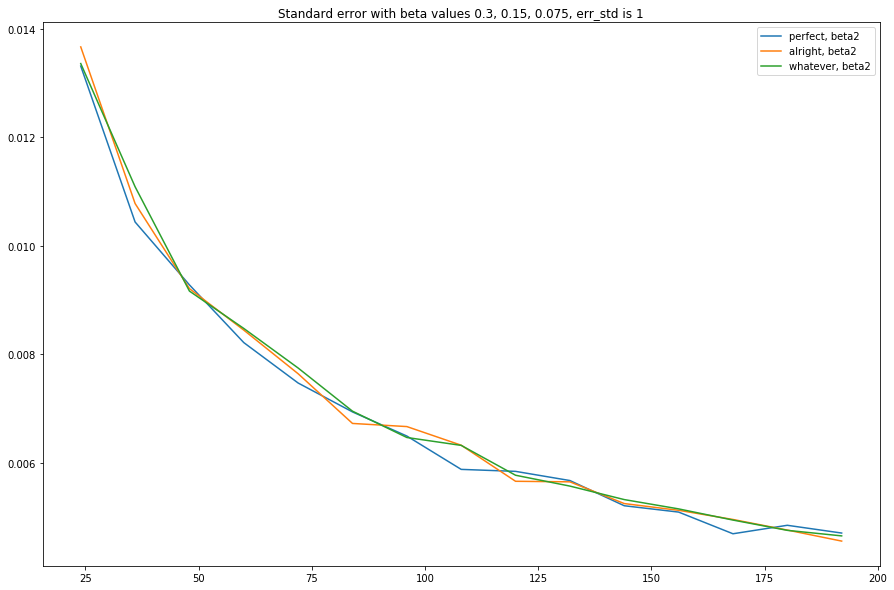

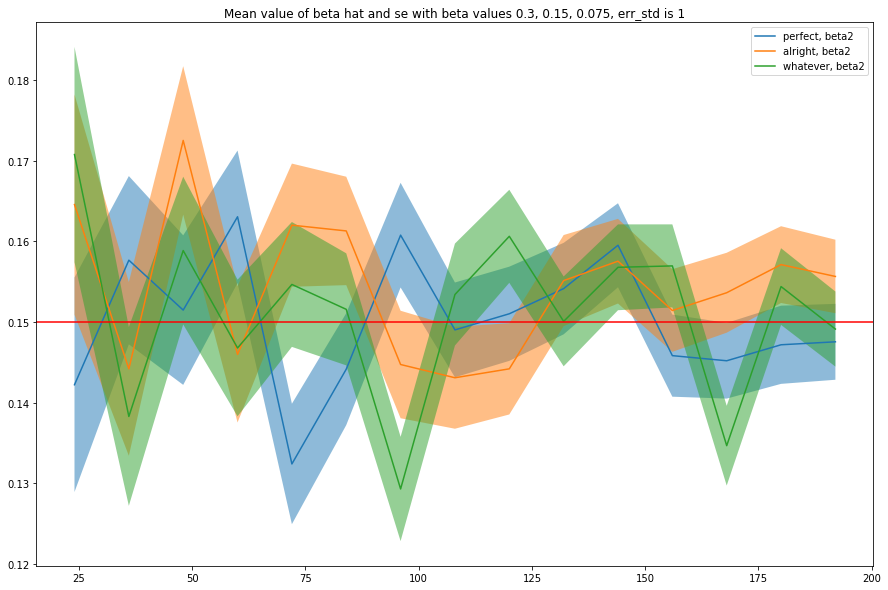

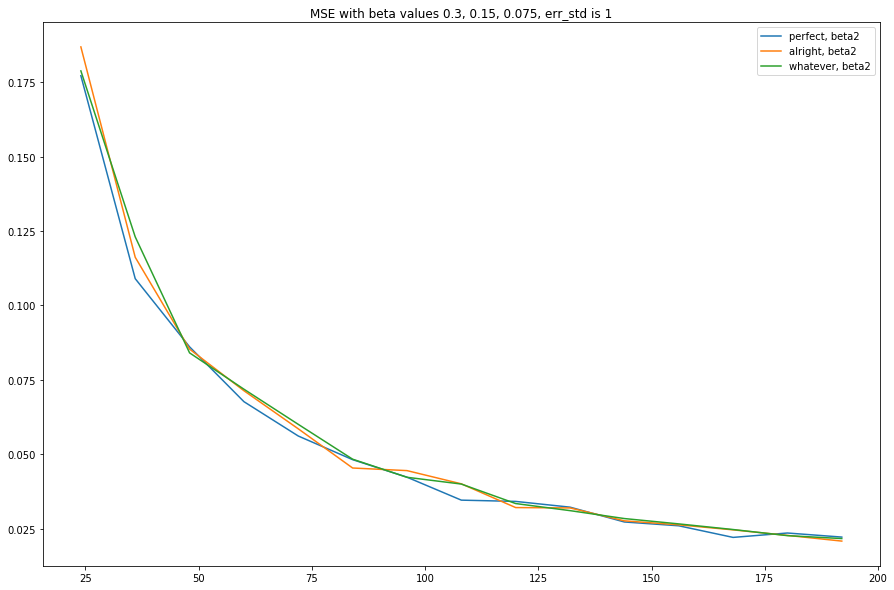

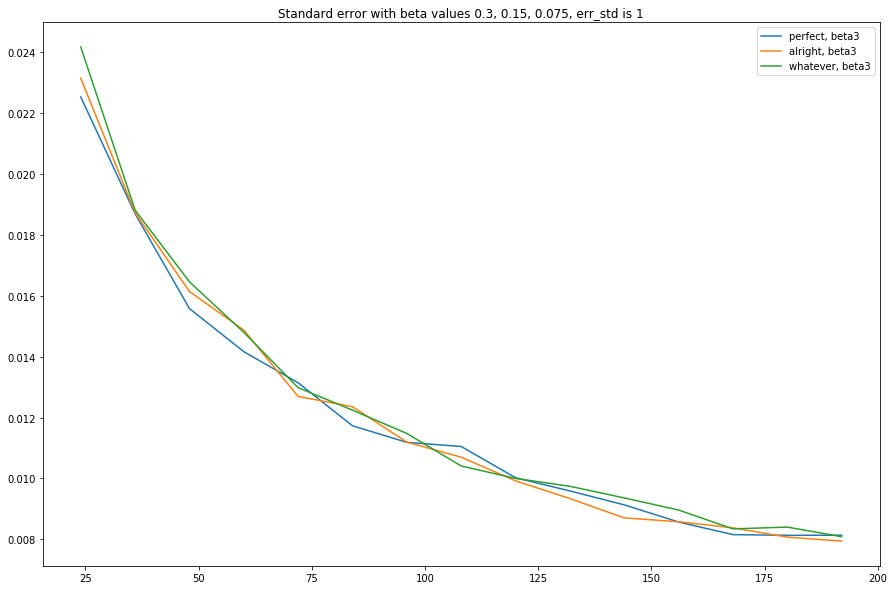

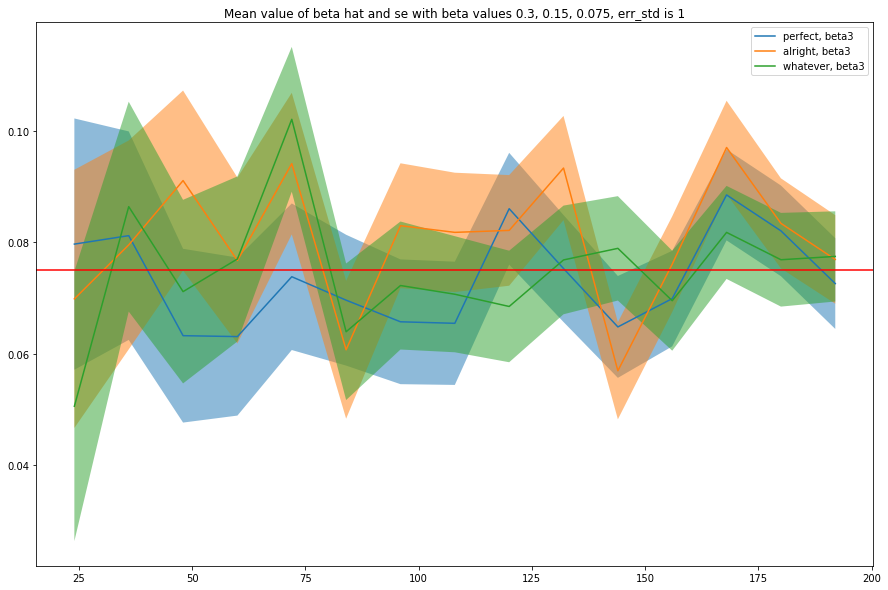

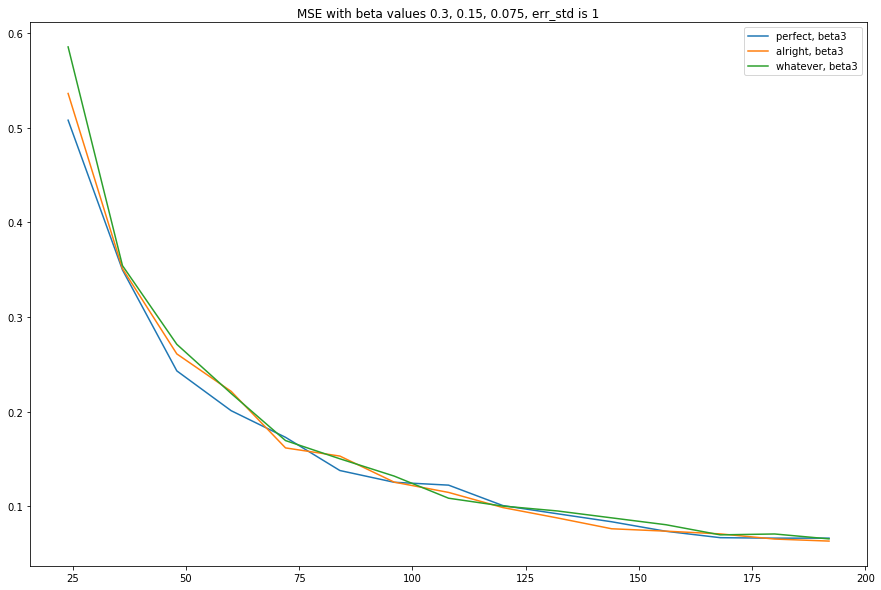

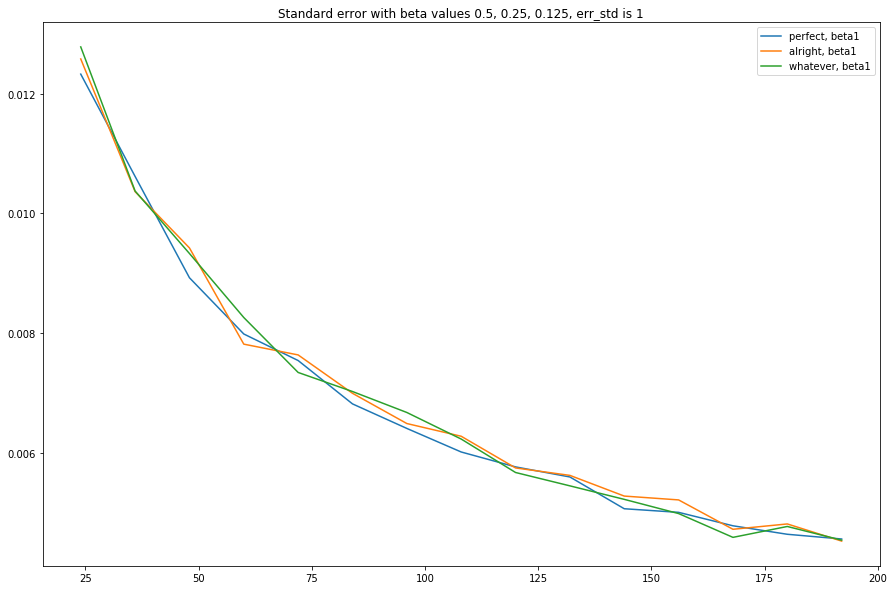

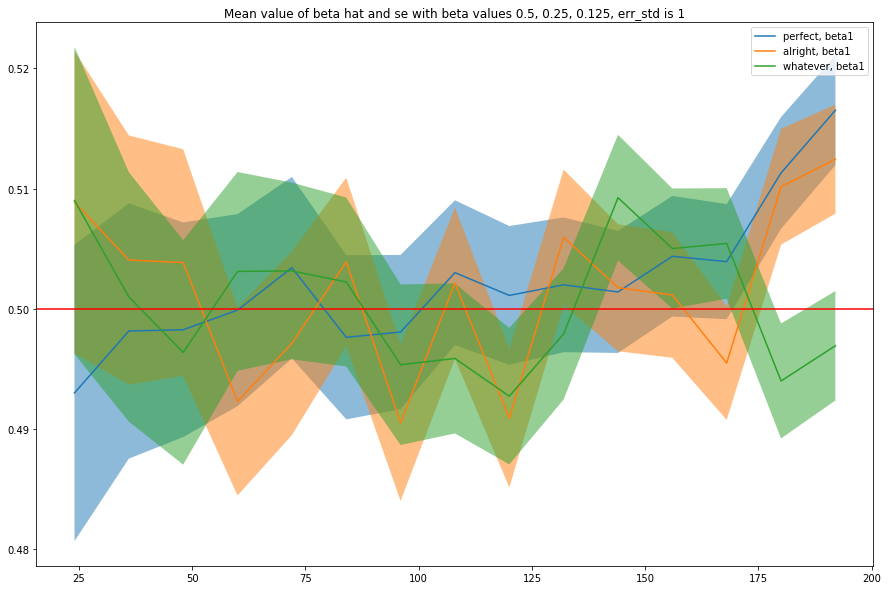

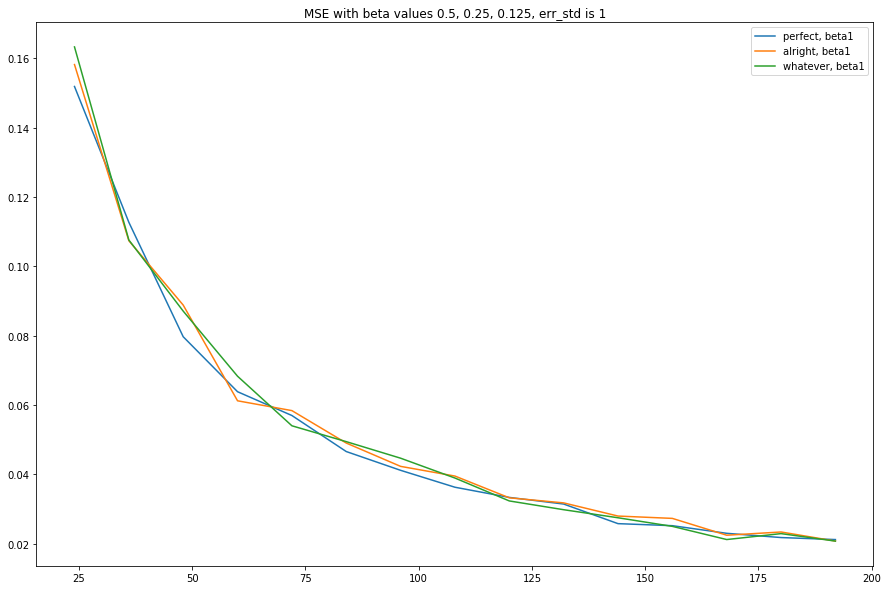

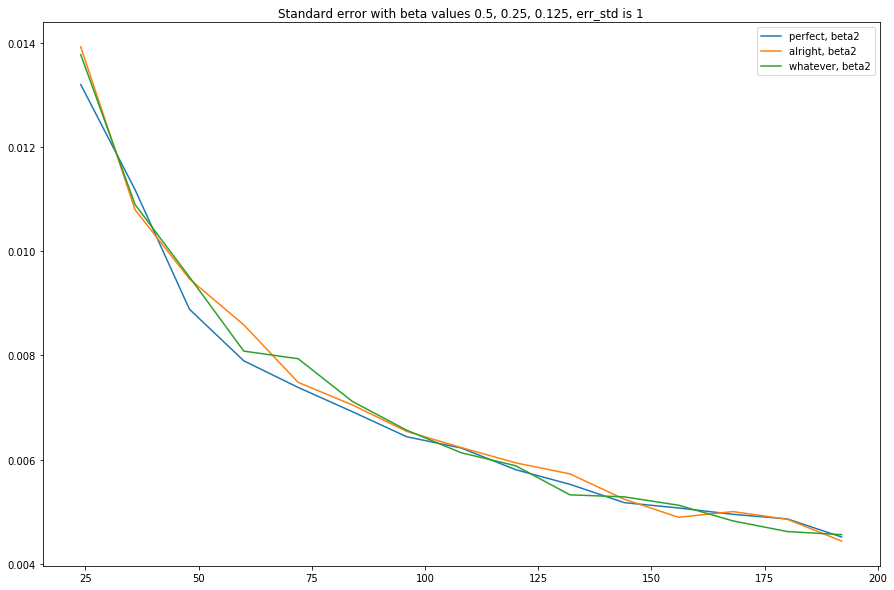

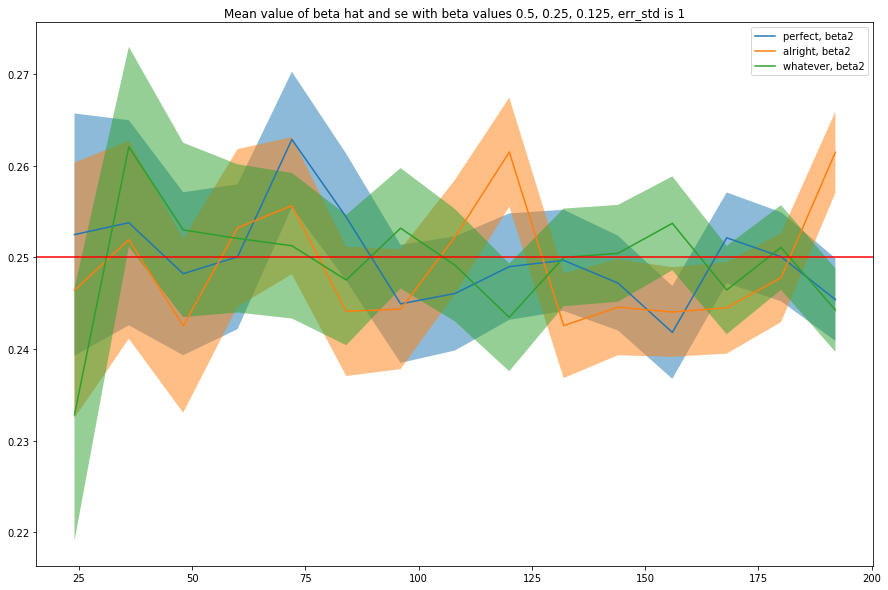

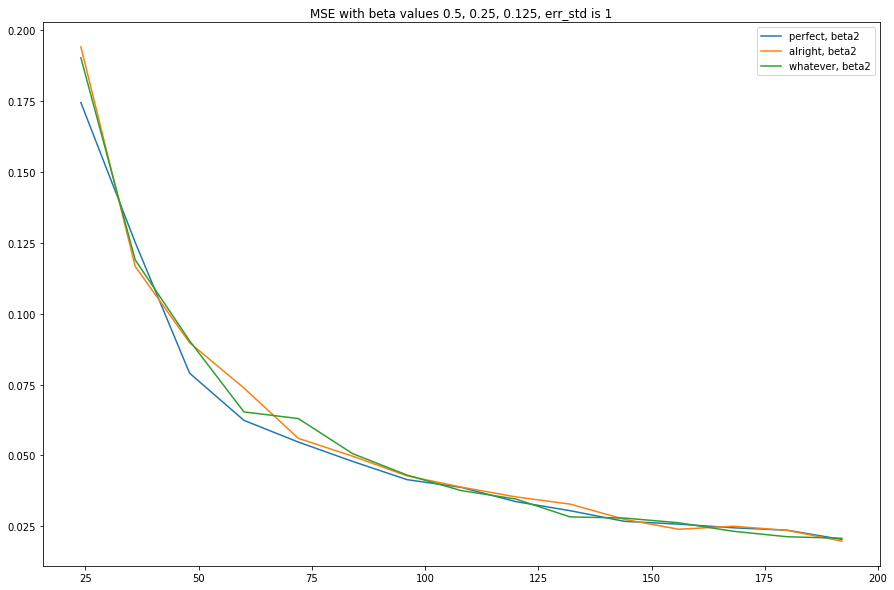

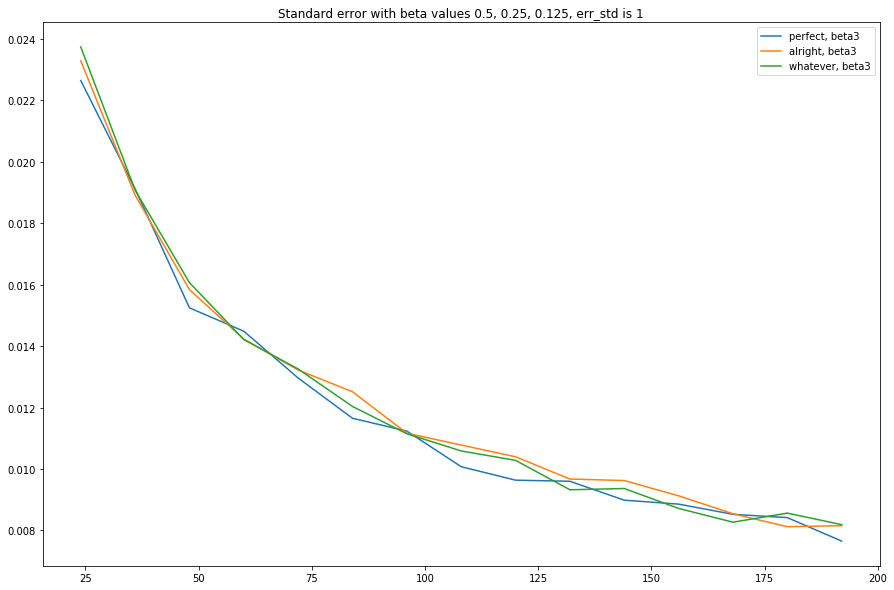

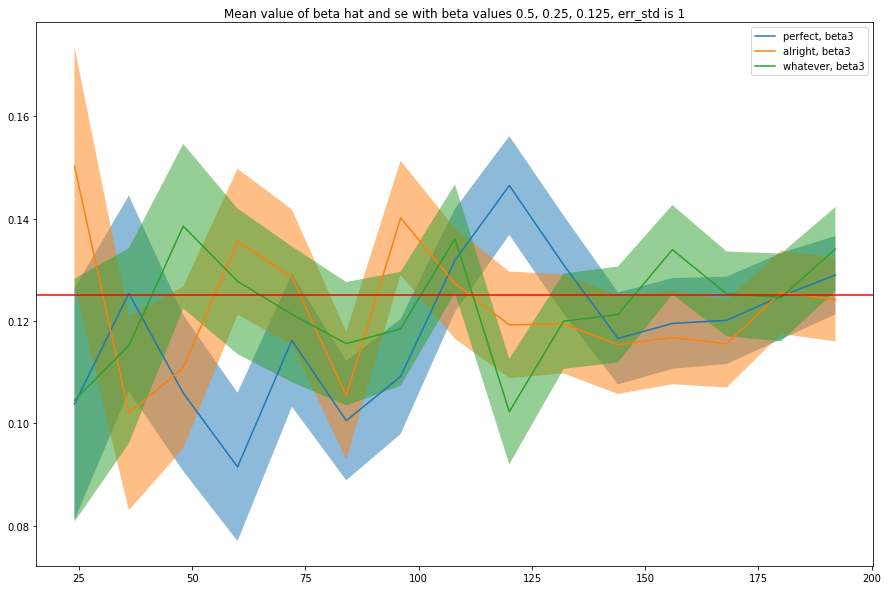

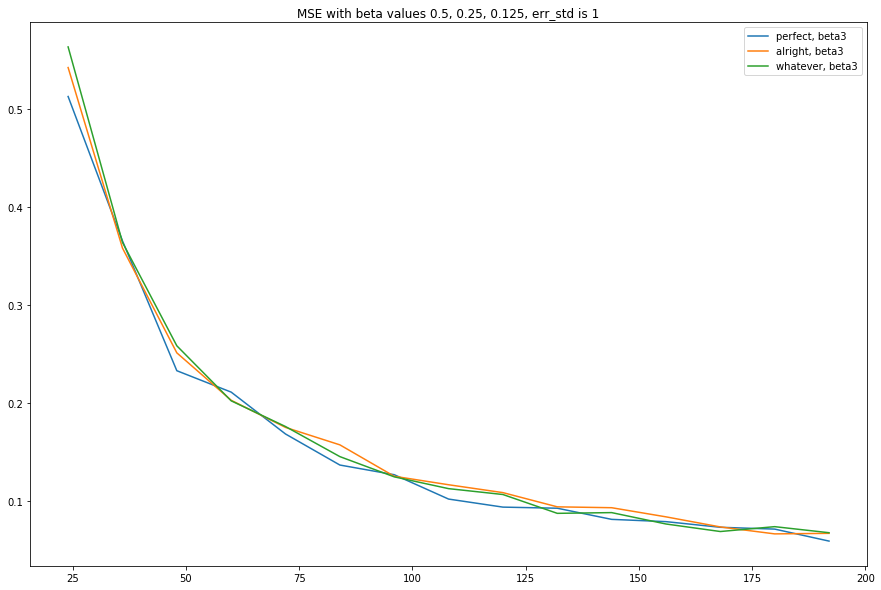

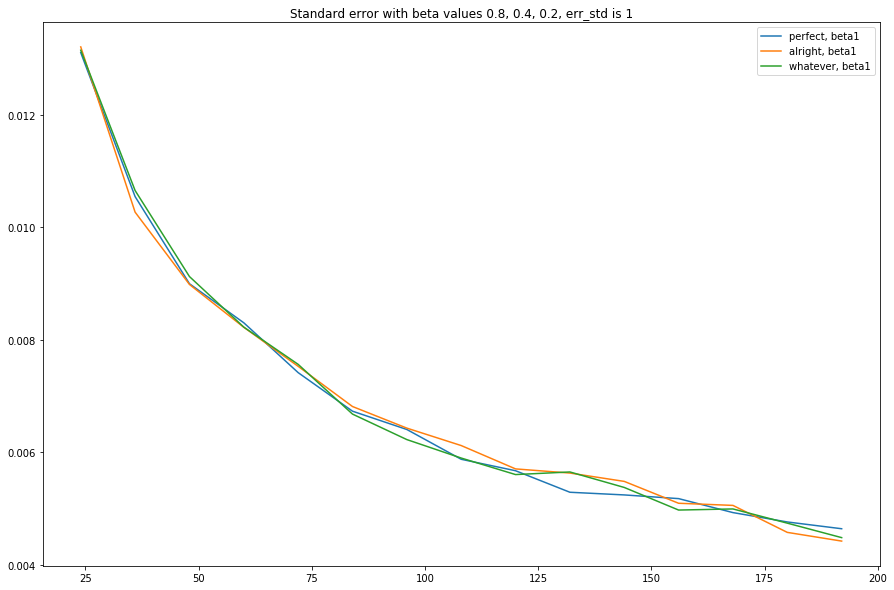

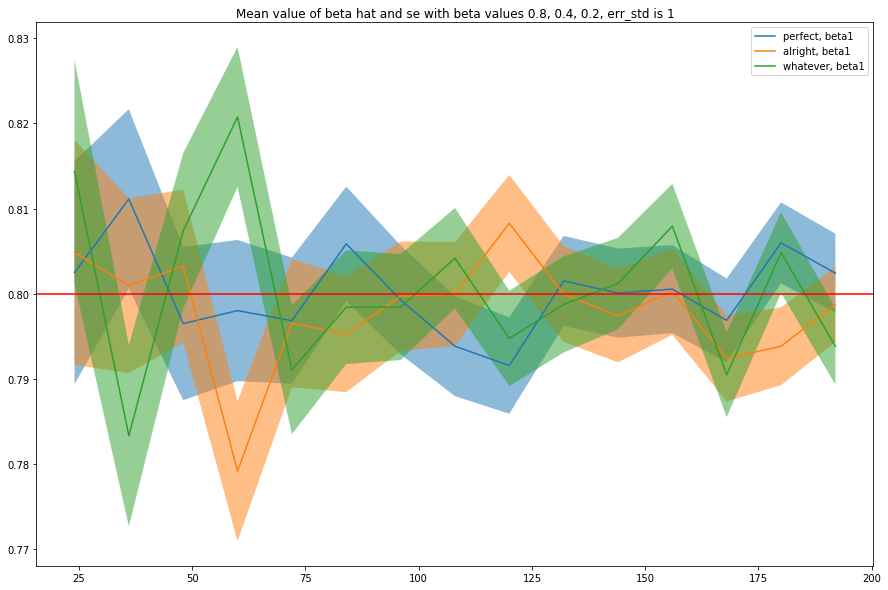

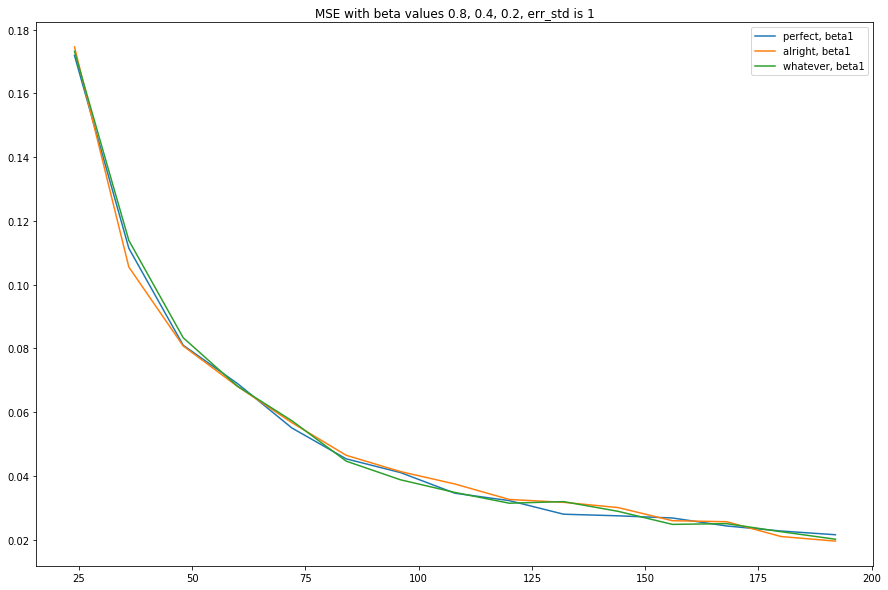

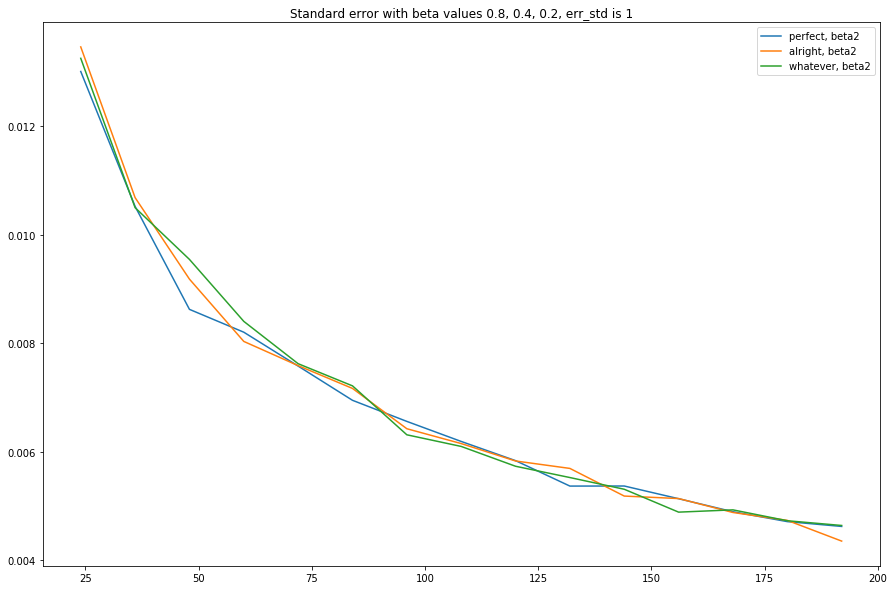

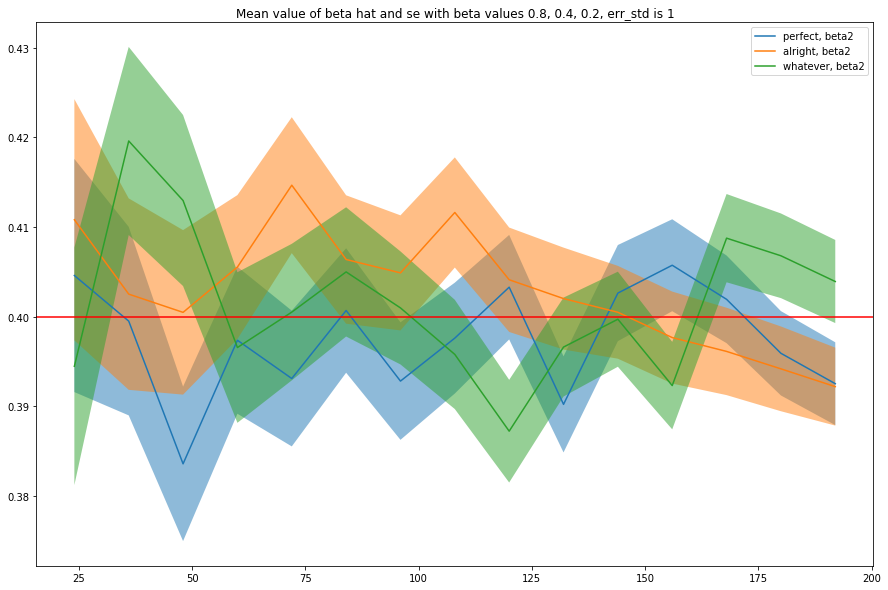

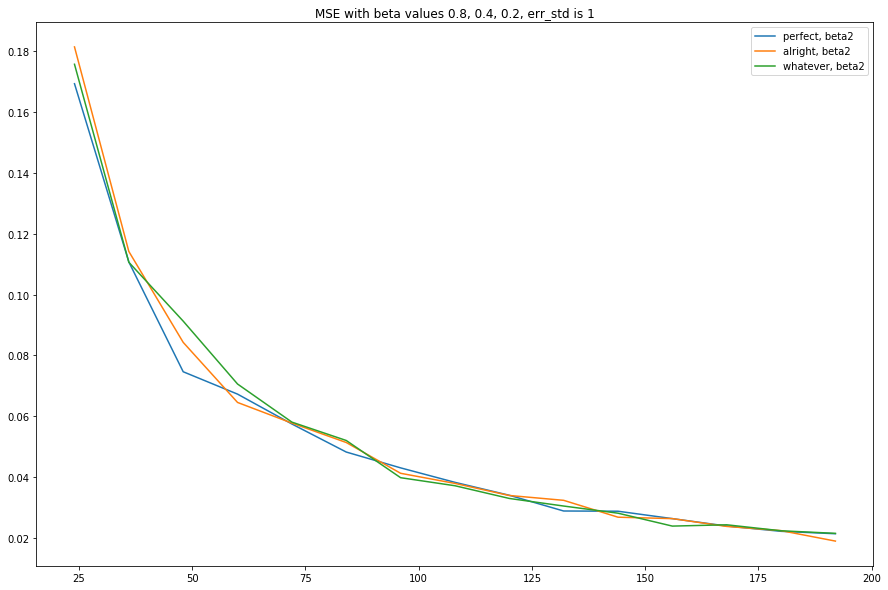

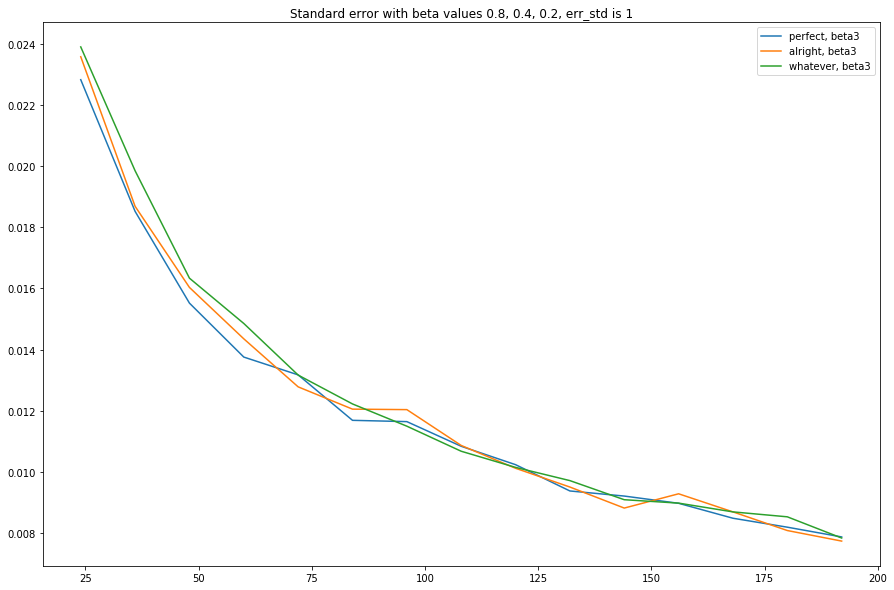

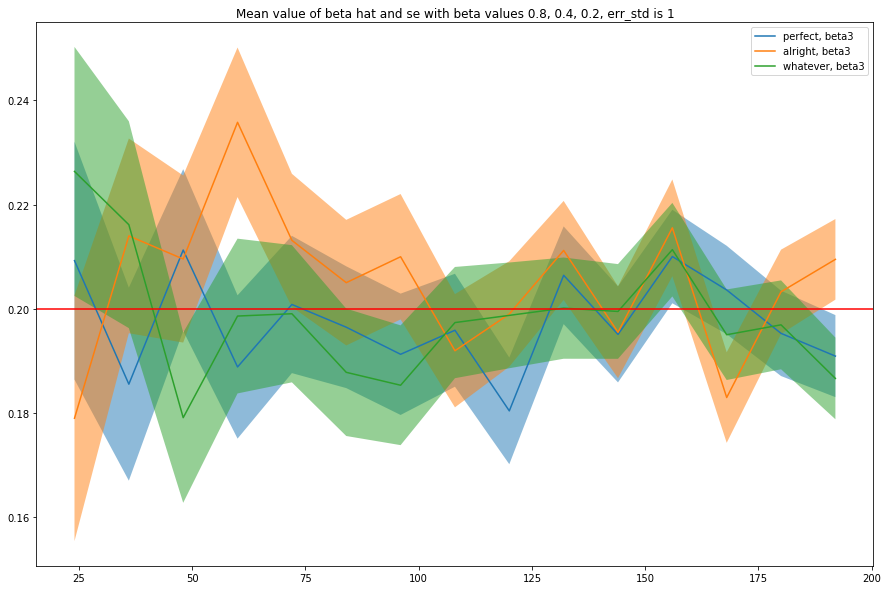

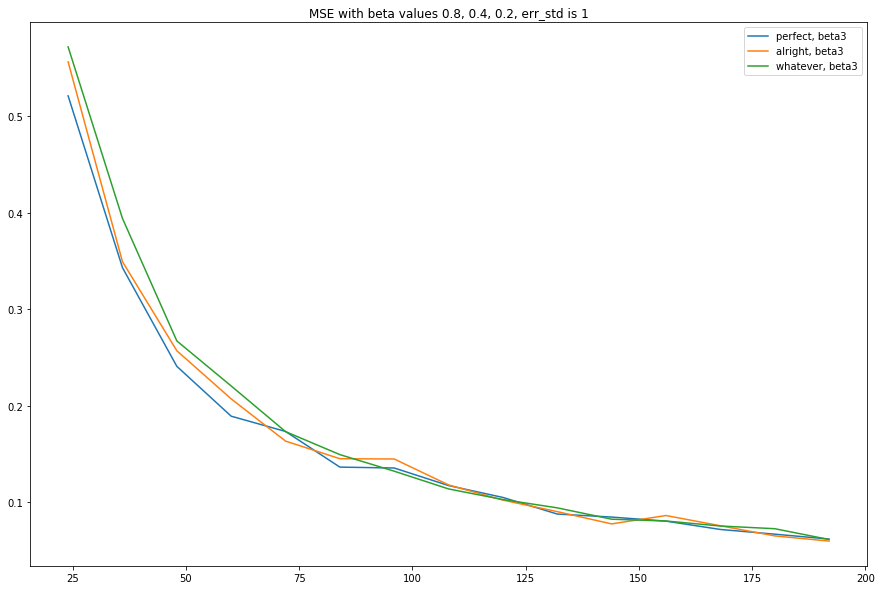

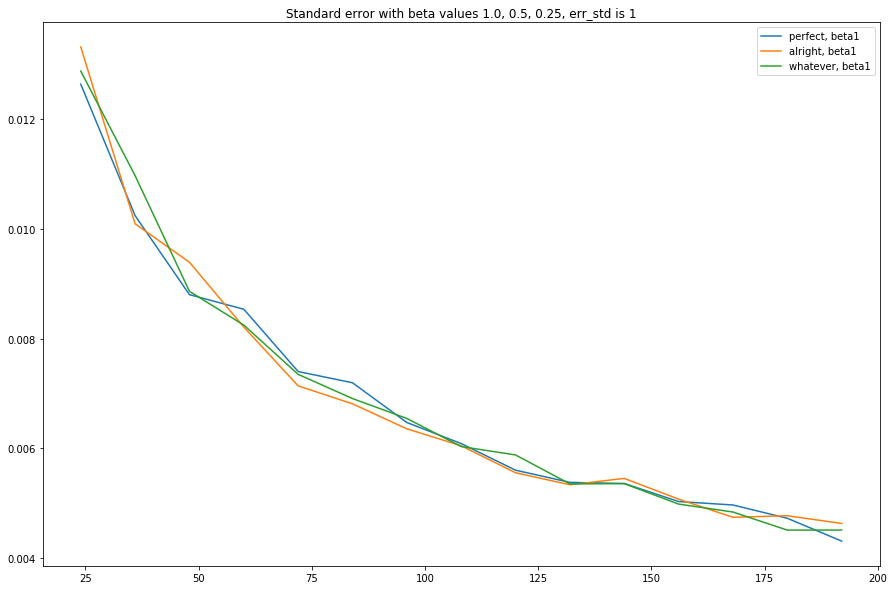

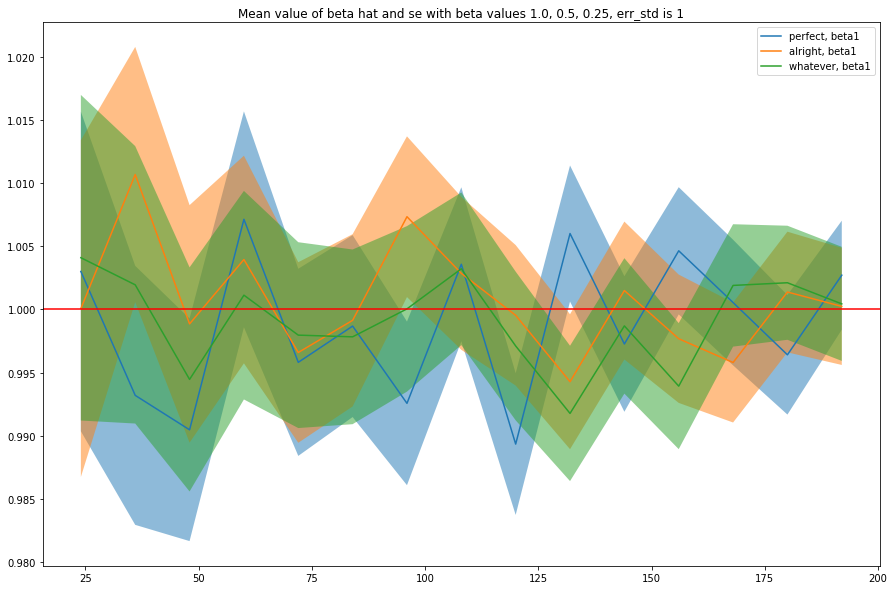

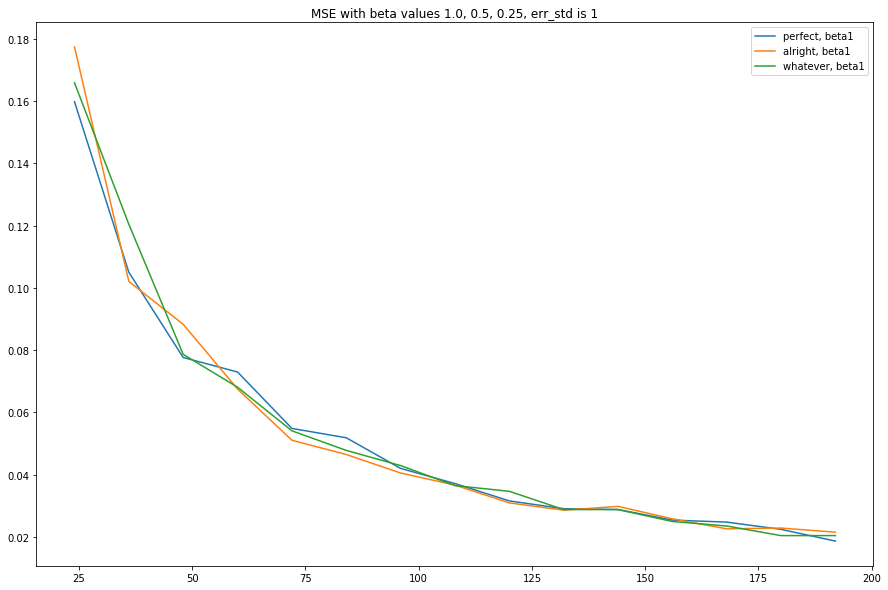

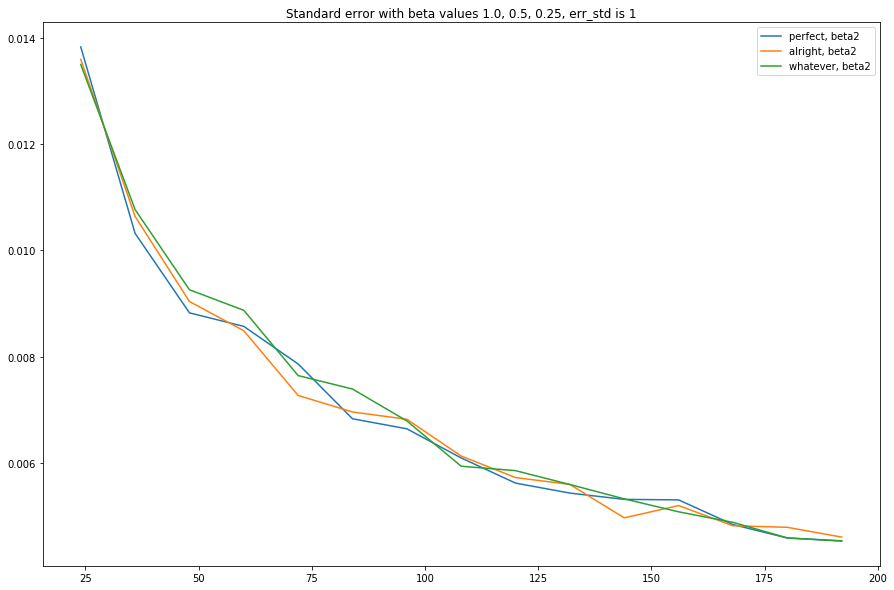

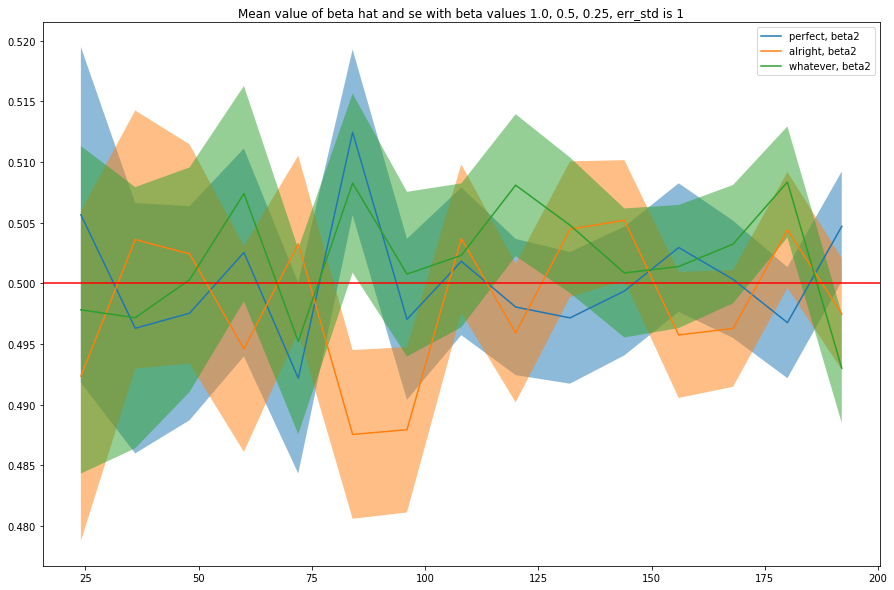

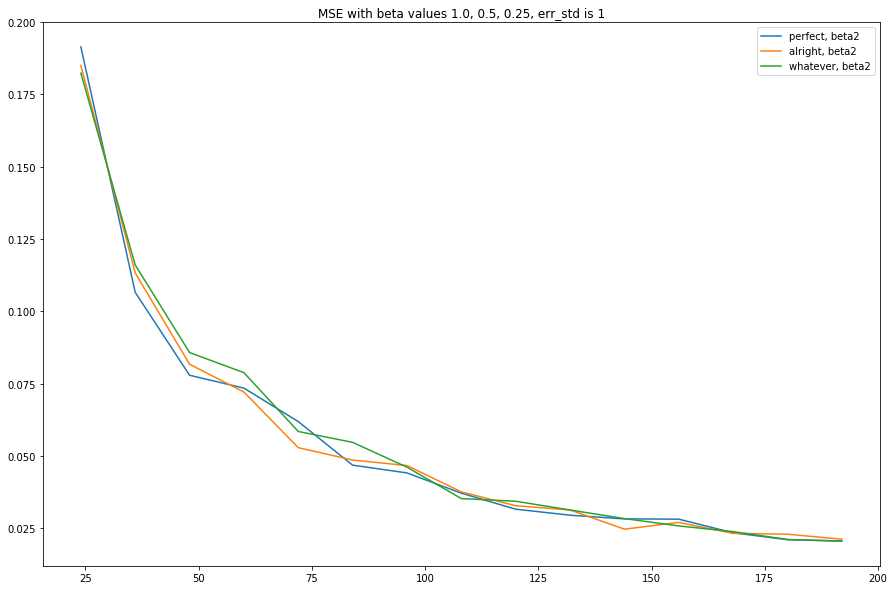

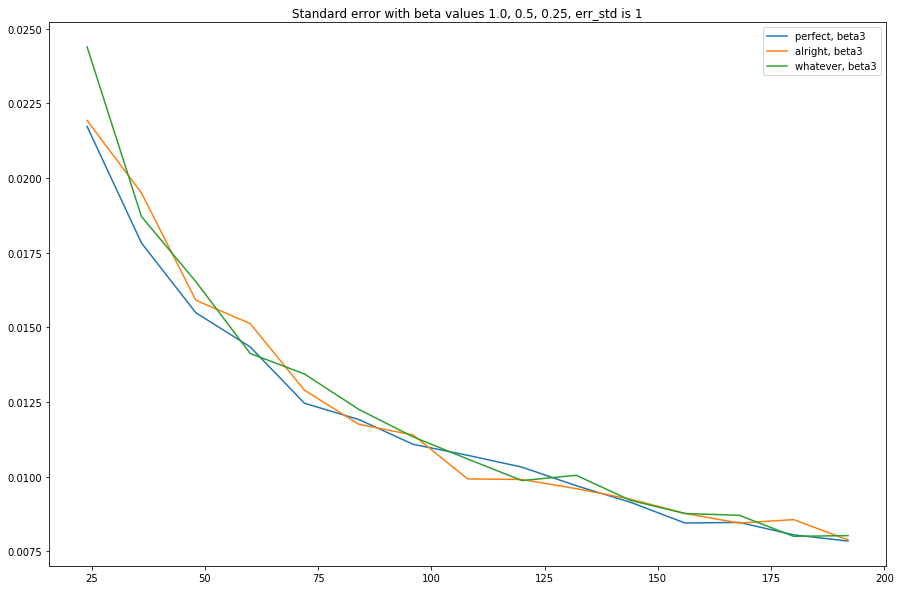

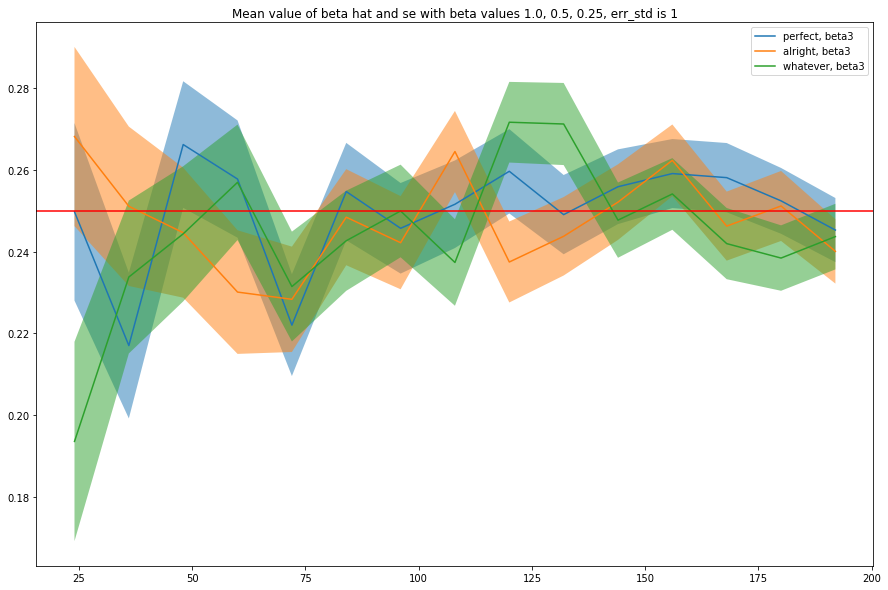

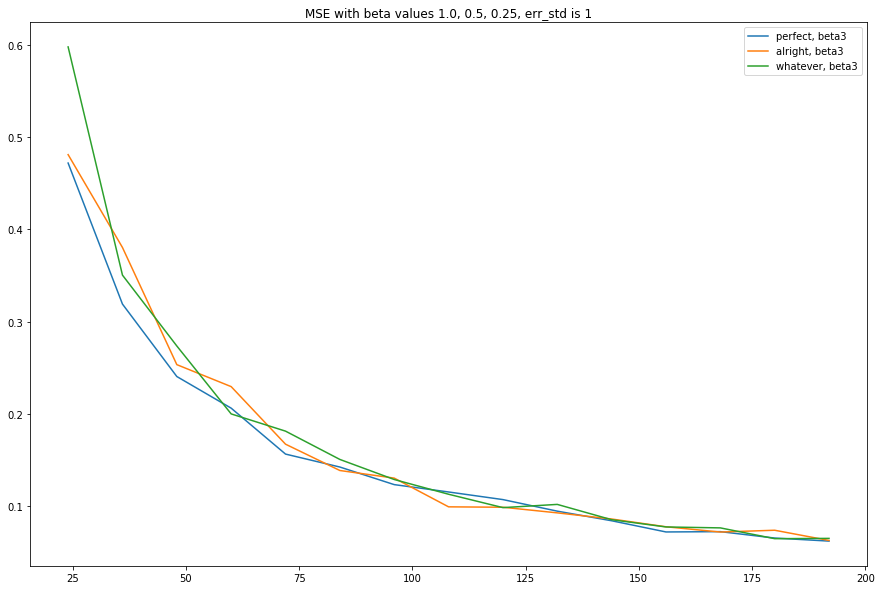

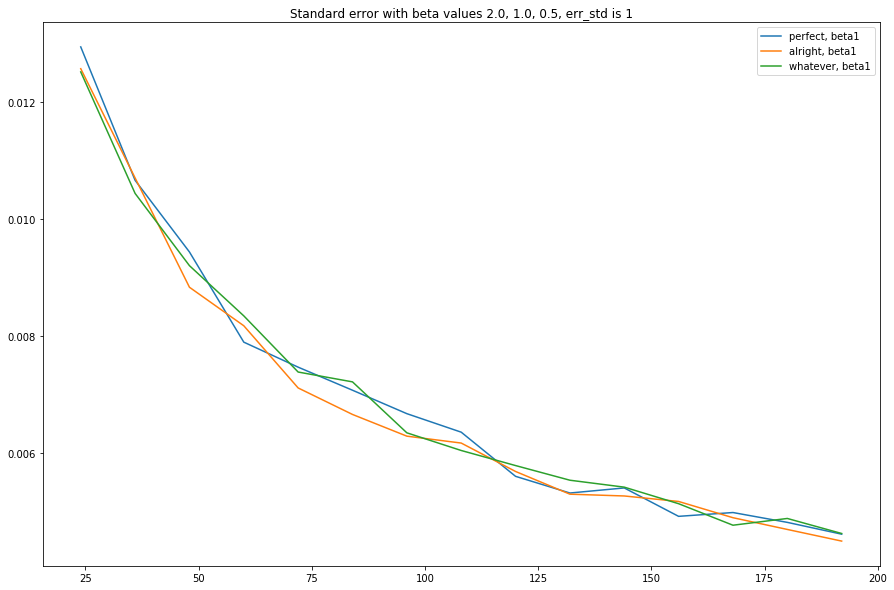

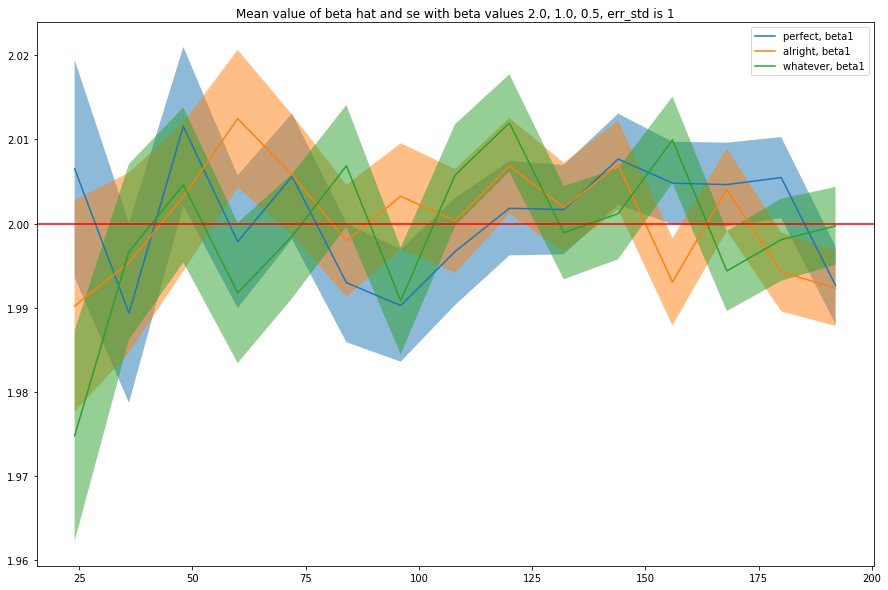

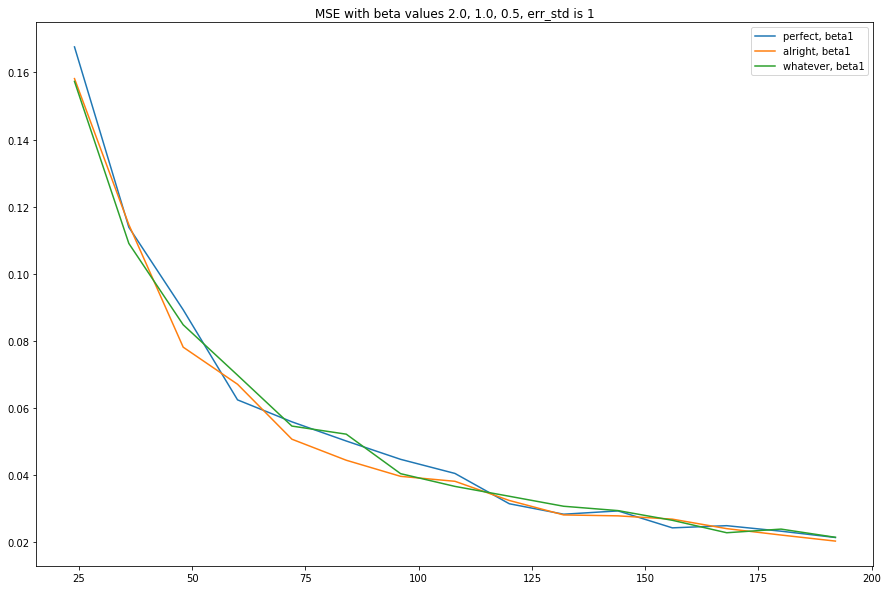

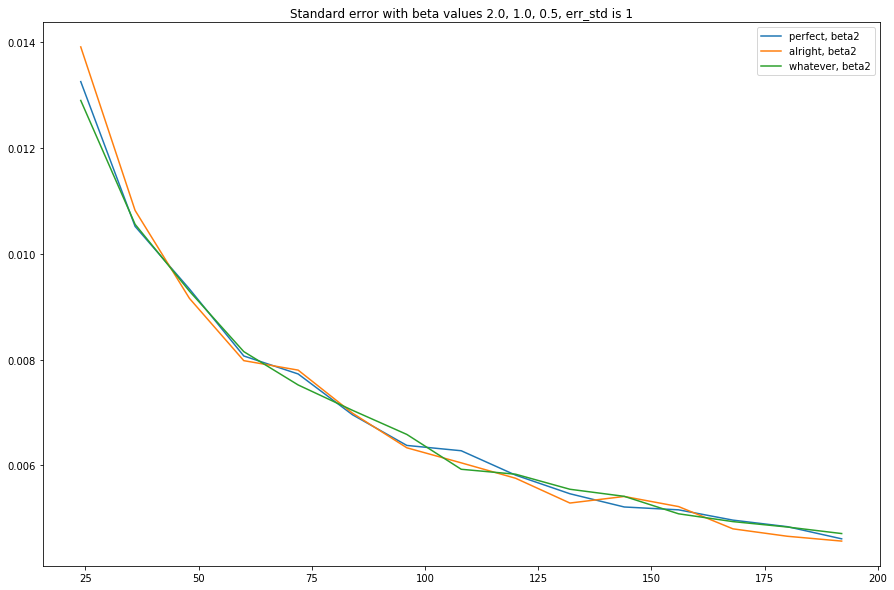

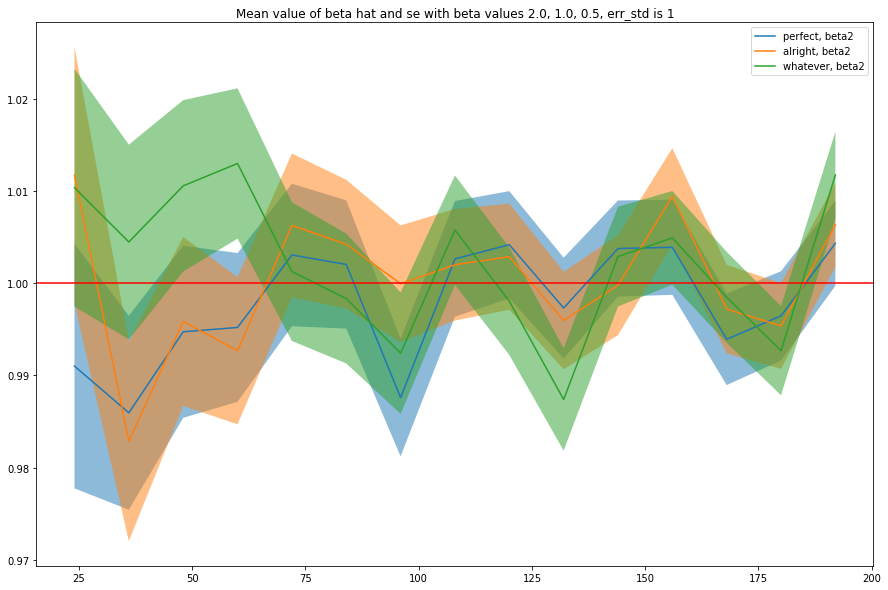

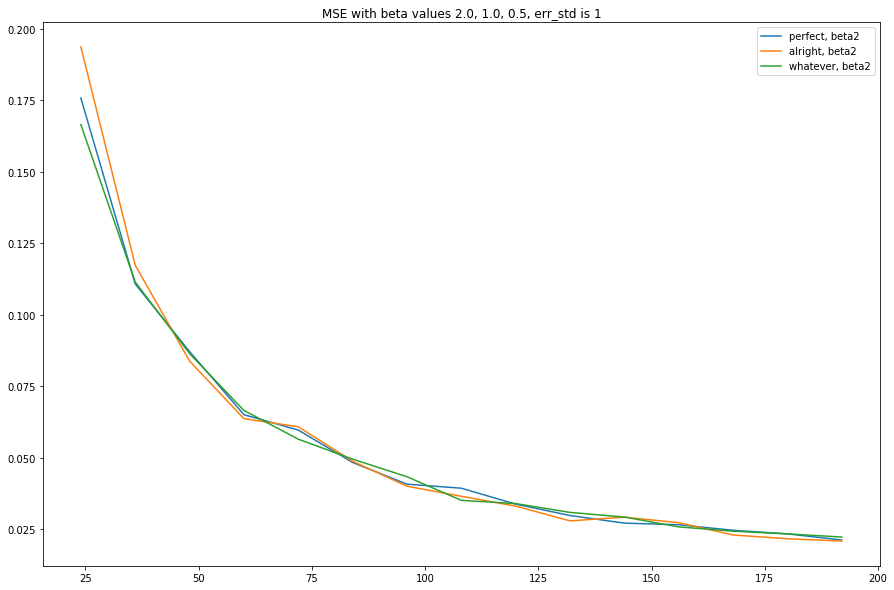

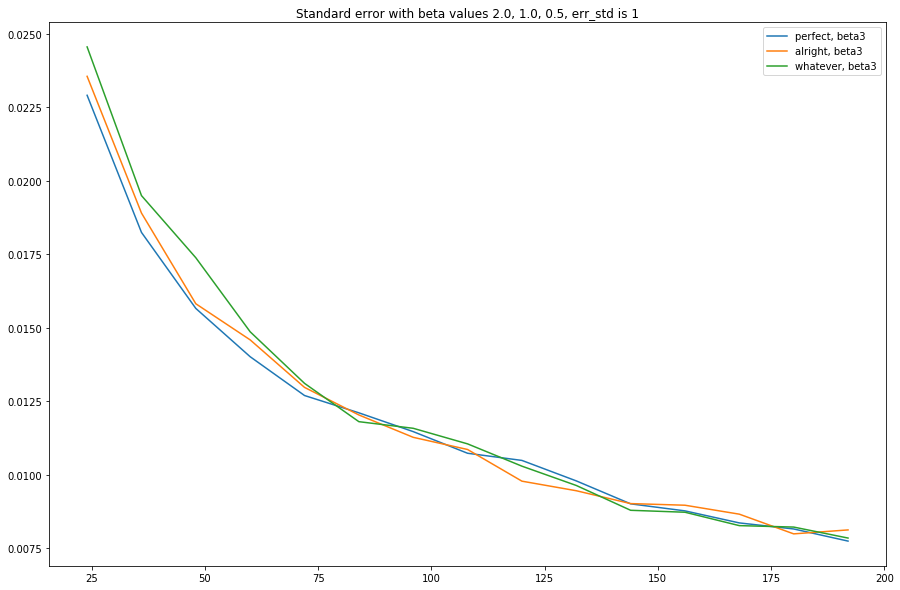

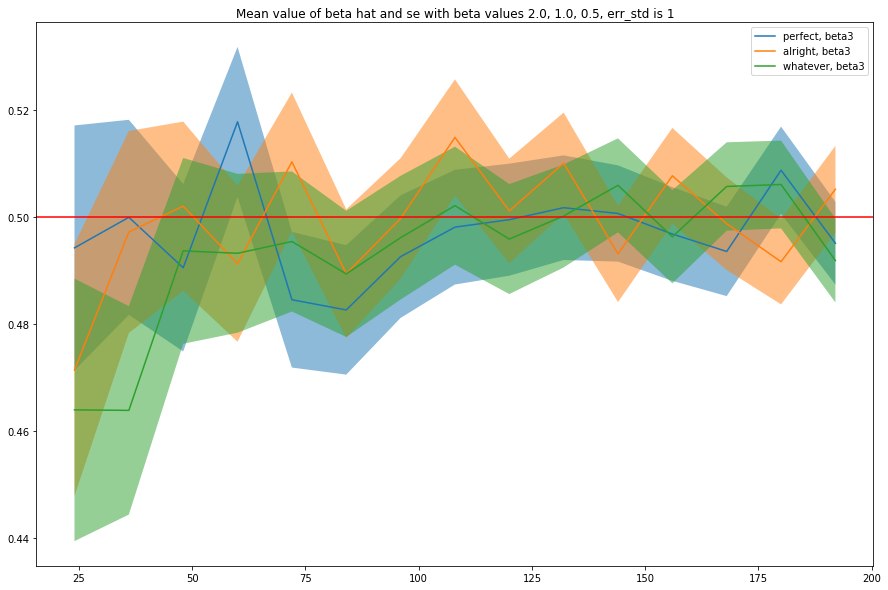

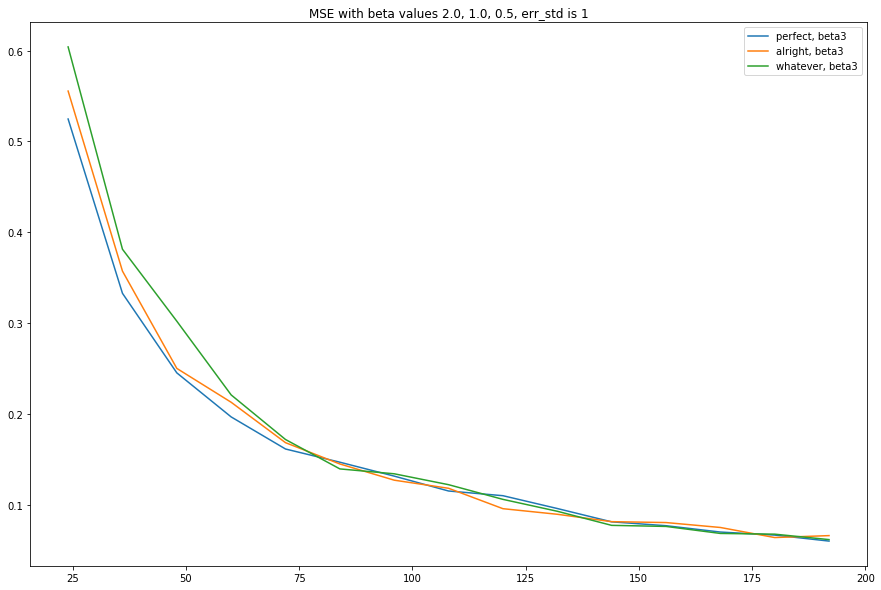

In [162]:
beta1_list = np.array([0.3,0.5,0.8,1,2])
beta2_list = beta1_list / 2
beta3_list = beta2_list / 2
for i in range(beta1_list.shape[-1]):
    for j in range(1,4):
        draw_plot(beta1_list[i],beta2_list[i],beta3_list[i], j)

In [206]:
def get_y_2(beta1, beta2, design_matrix, err_std = 1):
    """
    Difference of this and function get_y is that this does not contain beta3, i.e., the design matrix
    doesn't have the x * (x - 1) column.
    
    Take given parameter values and calculate y (response)
    y_t = beta1 * z_t + beta2 * z_t-1 + beta3 * (z_tz_t-1) + err
    
    Parameters:
    -------------------
    beta1: parameter corresponding with current item
    beta2: parameter corresponding with immediately previous item
    beta3: parameter corresponding with the product of current item and previous item
    design_matrix: the matrix calculated by the design matrix function
    err_std: error term's standard deviation, default is 1. (error term is draw from a normal distribution
             with mean 0 and std the given value or 1 by default)
    """
    
    m, n = design_matrix.shape
    y = np.zeros(m)
    for i in range(m):
        err = np.random.normal(0, err_std)
        y[i] = beta1 * design_matrix[i, 0] + beta2 * design_matrix[i, 1] + err
    
    return y 

In [71]:
r1, r2 = get_sequence(s1, var_dict)
m1 = design_matrix(r1)
res = experiment(0.8, 0.5, 0.3, design_matrix(r1))
a,b,c,d = np.linalg.lstsq(m1, res,rcond=None)
a

array([0.98123514, 0.48923778, 0.21987342])

In [169]:
"AB" * (6 // 2)

'ABABAB'

In [212]:
x = np.array([[1,2,2],[2,3,6],[3,4,12],[4,7,28]])
x

array([[ 1,  2,  2],
       [ 2,  3,  6],
       [ 3,  4, 12],
       [ 4,  7, 28]])

In [225]:
y = np.cov(x)
y

array([[  0.33333333,   0.83333333,   1.66666667,   4.5       ],
       [  0.83333333,   4.33333333,  10.16666667,  27.        ],
       [  1.66666667,  10.16666667,  24.33333333,  64.5       ],
       [  4.5       ,  27.        ,  64.5       , 171.        ]])

In [223]:
np.linalg.matrix_rank(np.cov(x))

2

In [227]:
u,s,v = np.linalg.svd(y)

In [229]:
np.matmul(u, y)

array([[  -3.11265715,  -18.11745071,  -43.12543997, -114.37152636],
       [   3.67311599,   22.57376417,   54.07484445,  143.32388519],
       [  -0.19910332,   -1.02831937,   -2.41034613,   -6.40182234],
       [  -0.78311912,   -3.59986719,   -8.29444731,  -22.06659386]])